In [1]:
from skimage.color import rgb2gray
import skimage.transform as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import skimage.exposure
import skimage.metrics as metrics

In [2]:
plt.gray() # makes image plots grayscale

lena = rgb2gray(imread('lena.tiff')) *255
cameraman = imread('cameraman.tif').astype(np.float64)
tire = imread('tire.tif').astype(np.float64) / 255.0


<Figure size 640x480 with 0 Axes>

In [3]:
lena.shape, cameraman.shape, tire.shape

((512, 512), (256, 256), (205, 232))

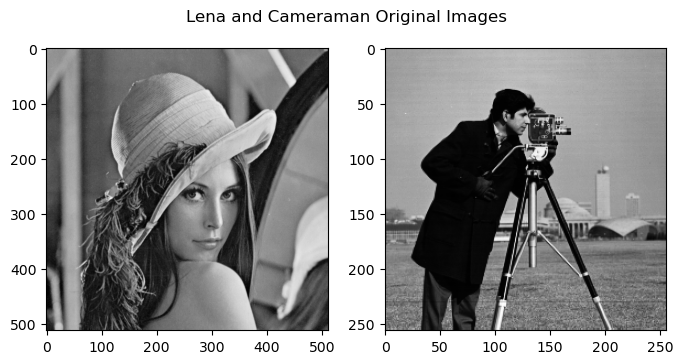

In [4]:
# plot all the images
fig, axs = plt.subplots(1, 2, figsize=(8, 8))
for i, image in enumerate([lena, cameraman]):
    axs[i].imshow(image, cmap='gray')

fig.suptitle('Lena and Cameraman Original Images')
plt.subplots_adjust(top=1.4)

In [5]:
def mse(f, g):
    m, n = f.shape
    return np.sum(np.square(f - g)) * (1 / (m*n))

def PSNR(f, g):
    f = f.astype(np.float64)
    g = g.astype(np.float64)

    return 10 * np.log10(255.0**2 / mse(f, g))

In [6]:
# reduce each image resolution by a factor of 4 (horizontally and vertically)
def reduce_resolution(image, title, factor):
    new_shape = image.shape[0] // factor, image.shape[1] // factor
    print(f"Old shape: {image.shape}, New shape: {new_shape}")
    image = tf.resize(image, new_shape, order=1)
    plt.imshow(image)
    plt.title(title)
    print(image.shape)
    return image

Old shape: (512, 512), New shape: (64, 64)
(64, 64)


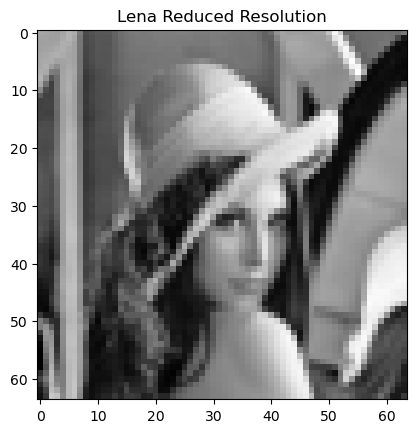

In [7]:
# then perform 
lena_reduced = reduce_resolution(lena, "Lena Reduced Resolution", 8)

Old shape: (256, 256), New shape: (64, 64)
(64, 64)


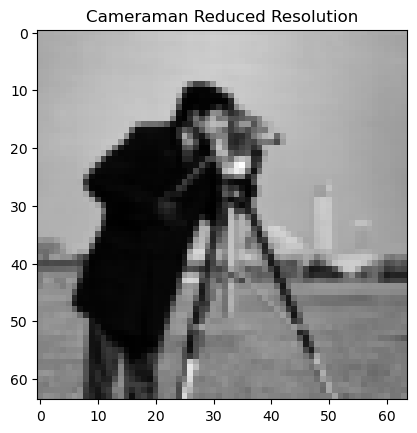

In [8]:
cameraman_reduced = reduce_resolution(cameraman, "Cameraman Reduced Resolution", 4)

### Perform digital zooming

In [9]:
def digital_zoom(image, factor, order, ax, title):
    """
    Perform digital zoom where order NN = 0, bilinear = 1, bicubic = 3
    """
    new_shape = image.shape[0] * factor, image.shape[1] * factor
    print(f"Old shape: {image.shape}, New shape: {new_shape}")
    image = tf.resize(image, new_shape, order=order)
    ax.imshow(image)
    ax.title.set_text(title)
    return image

In [10]:
method_order_to_name = {
            0: "Nearest Neighbor",
            1: "Bilinear",
            3: "Bicubic"
        }

def zoom_image_different_methods(image, factor):
    images = []
    fig, axs = plt.subplots(1, 3, figsize=(15, 15))
    for i in range(3):
        order = i
        if i == 2:
            order = 3
        zoomed_image = digital_zoom(image, factor, order, axs[i], f"Digital Zooming with {method_order_to_name[order]} Interpolation")
        images.append(zoomed_image)
    return fig, images

Old shape: (64, 64), New shape: (512, 512)
Old shape: (64, 64), New shape: (512, 512)
Old shape: (64, 64), New shape: (512, 512)


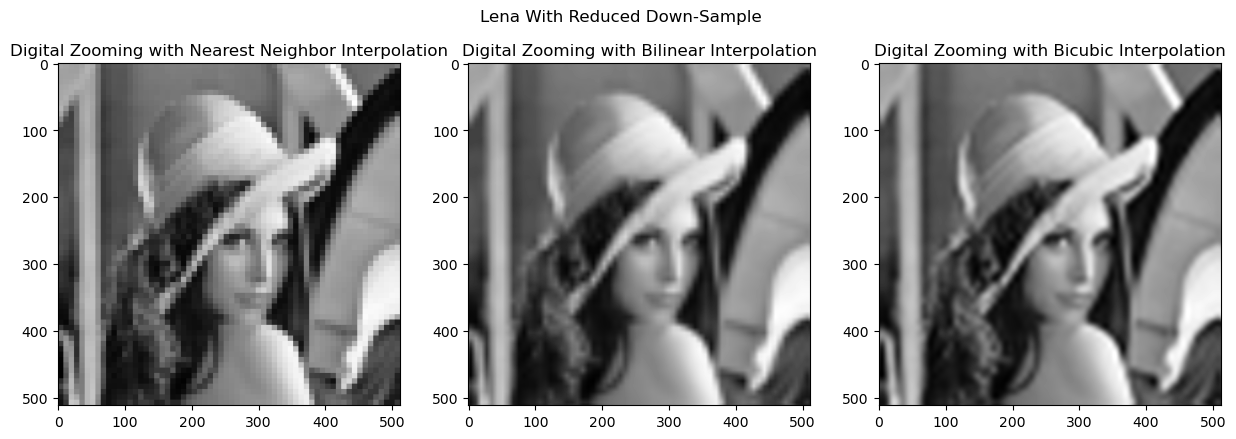

In [32]:
fig, lena_images = zoom_image_different_methods(lena_reduced, 8)
fig.suptitle("Lena With Reduced Down-Sample")
plt.subplots_adjust(top=1.55)

Old shape: (64, 64), New shape: (256, 256)
Old shape: (64, 64), New shape: (256, 256)
Old shape: (64, 64), New shape: (256, 256)


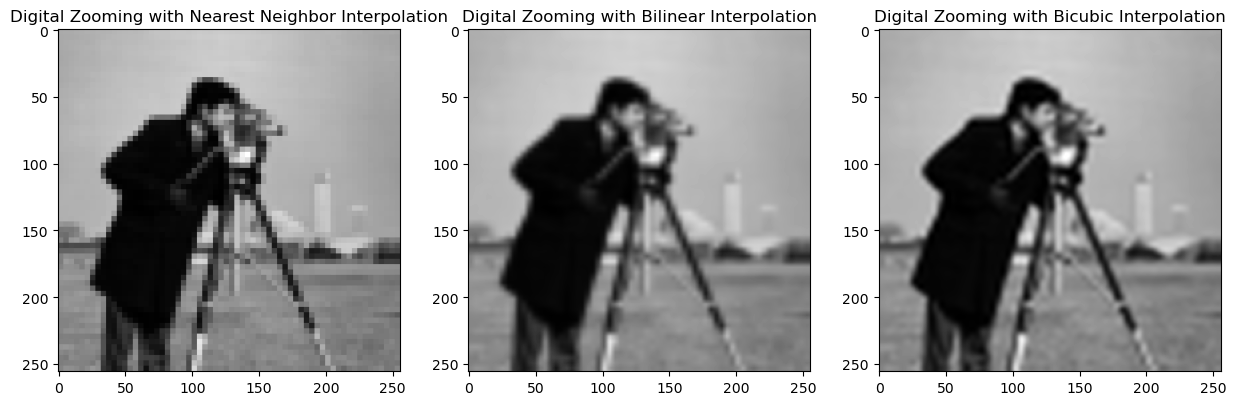

In [12]:
_, cameraman_images = zoom_image_different_methods(cameraman_reduced, 4)

In [13]:
for i, l_image in enumerate(lena_images):
    order = i
    if i == 2:
        order = 3
    upsample_method = method_order_to_name[order]
    print(f"PSNR between Lena image and up-sampled image using {upsample_method.lower()} interpolation: {PSNR(lena, l_image)}")


PSNR between Lena image and up-sampled image using nearest neighbor interpolation: 23.103863720326977
PSNR between Lena image and up-sampled image using bilinear interpolation: 23.525454090823047
PSNR between Lena image and up-sampled image using bicubic interpolation: 24.32574210981326


In [14]:
for i, c_image in enumerate(cameraman_images):
    order = i
    if i == 2:
        order = 3
    upsample_method = method_order_to_name[order]
    print(f"PSNR between Cameraman image and up-sampled image using {upsample_method.lower()} interpolation: {PSNR(cameraman, c_image)}")

PSNR between Cameraman image and up-sampled image using nearest neighbor interpolation: 21.63163010175316
PSNR between Cameraman image and up-sampled image using bilinear interpolation: 21.917800814357268
PSNR between Cameraman image and up-sampled image using bicubic interpolation: 22.507738531349844


## Q3 Questions

1. What can you observed about the up-sampled images produced by each of the methods?

All of the images have lost information about the original image. The result produced is of lower quality, blurred images (compared to original). However, the upsampled bicubic method is of higher quality compared to the downscaled image. 

2. How do the different methods compare to each other in terms of PSNR as well as visual quality?
Why?

In terms of PSNR, the lowest order interpolation (nearest neighbour) was the worse, followed by bilinear, and finally followed by the cubic method (in both cases). Additionally, with increasing PSNR values, the visual quality of the image also increased (however only slightly). This makes sense since a higher peak signal to noise ratio means that these is a smaller MSE for the images (thus they are closer in value to eachother). Furthermore, the higher order interpolation for digital zooming preserves fine details better thus we would expect these results.


3. What parts of the image seems to work well using these digital zooming methods? What parts of the image doesn’t? Why?

Digital zooming seems to do well at preserving the general contents of the image; in particular parts of the image with low frequency signal. For example, lena's general facial shape, body, her hat shape, and objects in the background are well preserved. This makes sense since the interpolation methods are able to keep high level spacial information during the transformation. However, high frequency signal such as the details in the feathers on lena's hat, Lena's eye lashes, or details on lena's hat are not well preserved by digital zooming as the fine details get lost by interpolations and aggregations of information. 


4. Compare the zooming results between Lena and Cameraman. Which image results in higher PSNR?
Which image looks better when restored to the original resolution using digital zooming methods?
Why?

In general, the lena image had higher PSNR across all zooming methods. Furthermore, the lena image looks better compared to the camera image when restored to the original resolution. The main reason is that the lena image started at a resolution that was 2x that of the camera man. Thus, the down-scaled images of lena were able to preserve 2x as much information/signal (since they were both scaled by the same factor) which produced better results after using digital zooming. More signal => better results.


5. What does the PSNR tell you about each of the methods? Does it reflect what is observed visually?

The PSNR tells us in general the performance of each method is relatively similar; the values between different methods are much closer than the gap between lena and the cameraman. Visually, there isn't a huge difference between the different methods, which is shown by the close PSNR values However, the PSNR does not provide a good metric in absolute terms for the quality of an image that is interpretable for humans (it is only useful in relative terms,compared to other PSNR valuess). 

## Q4: Point Ops for Image Enhancement

Text(0.5, 1.0, 'Tire Image Histogram')

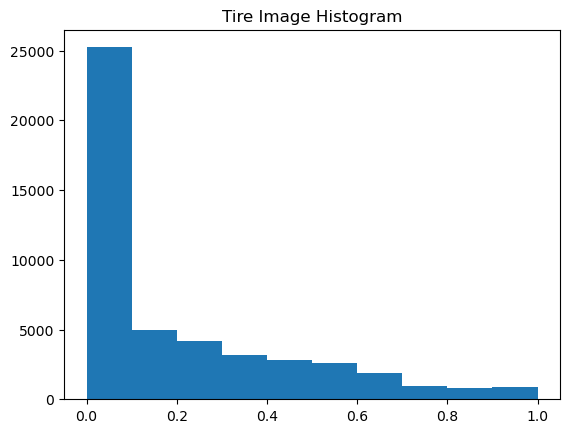

In [15]:
tired_flattened = tire.flatten()
plt.hist(tired_flattened)
plt.title("Tire Image Histogram")

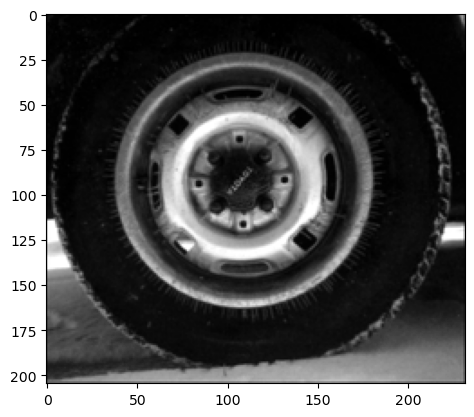

In [16]:
plt.imshow(tire)

In [17]:
tired_flattened.mean()

0.2104422896155939

## Q4
6. Explain what the histogram of an image represents. Why is it useful?

The histogram of a single channel image (grey-scale) represents the distribution of grey levels in the image. In particular, the histogram represents the probability of occurance for any particular pixel intensity. The histograms are useful to understand the distribution of pixel intensities numerically and to enable point processing for image enhancement. 

7. Describe how the histogram looks like in the context of intensity distribution. What does the histogram say about the image?

In the context of intensity distribution, the histogram shows the probability of occurance for any particular pixel intensity (ie. p(k) = n / N). Particularly, it shows that there is a very large distribution of dark pixels, and decreasing amounts of light pixels. Based on the mean inferred from the histogram, we can tell that the image is generally dark. Based on the spread in the histogram (variance; right skew) we can tell that there is limited contrast in the image. 

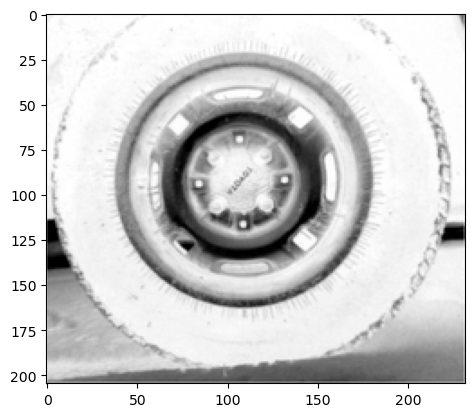

In [18]:
# calculate the image negative transform
tired_neg_transform = 1.0 - tire
plt.imshow(tired_neg_transform)

Text(0.5, 1.0, 'Tire Image Negative Transform Histogram')

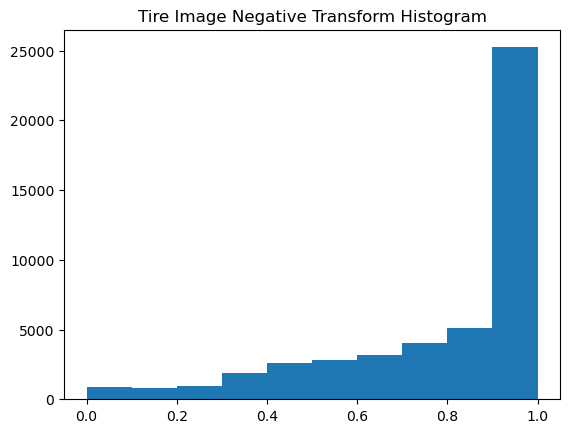

In [19]:
plt.hist(tired_neg_transform.flatten())
plt.title("Tire Image Negative Transform Histogram")

## Q4. 

8. Describe how the histogram looks like in the context of intensity distribution. How does it differ from
the histogram of the original image? Why?

In the context of intensity distribution, this histogram has many light valued pixels and decreasing amounts of dark pixels (generally a lighter image). Furthermore, it is left skewed, showing still not much contrast. Compared to the original image, it is the complementary probability distributions. This is because the transformation computes 1 - p(k) for pixel intensity values. 

In [20]:
# apply power law transformations to tire image
gamma_1, gamma_2 = 0.5, 1.3

power_law_1_transform = tire ** gamma_1
power_law_2_transform = tire ** gamma_2

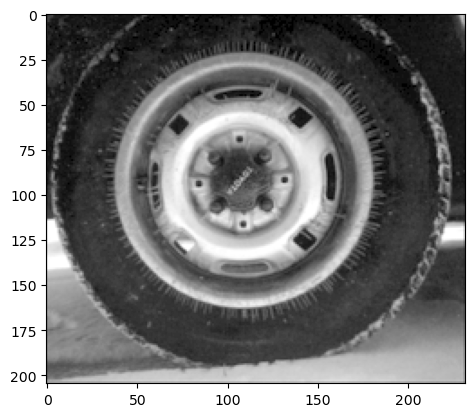

In [21]:
plt.imshow(power_law_1_transform) 

(array([ 4401.,  9762., 10145.,  4351.,  3501.,  4198.,  3669.,  3875.,
         2043.,  1615.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

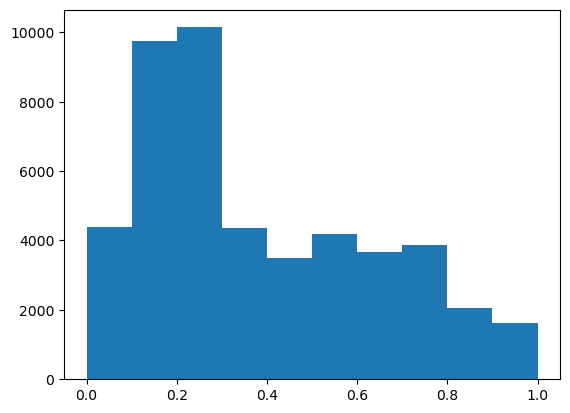

In [22]:
plt.hist(power_law_1_transform.flatten())

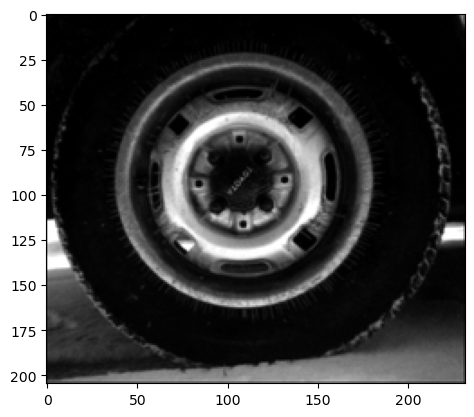

In [23]:
plt.imshow(power_law_2_transform)

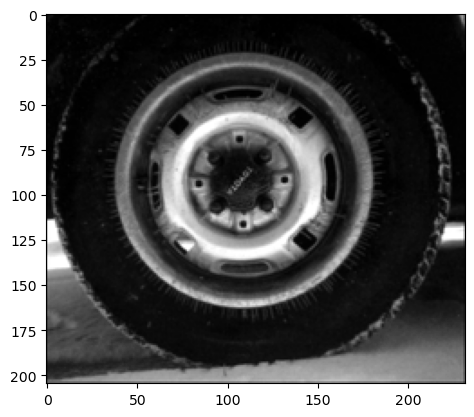

In [24]:
plt.imshow(tire)

(array([29173.,  4724.,  3623.,  2721.,  2353.,  1977.,   943.,   686.,
          564.,   796.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

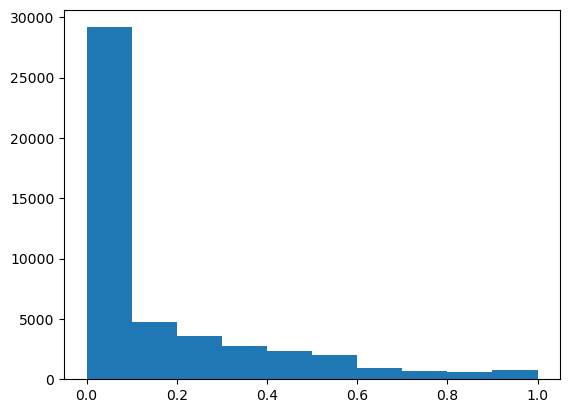

In [25]:
plt.hist(power_law_2_transform.flatten())

## Q4.
9. Describe the appearance of the transformed images. Why do they appear this way?

The image with gamma = 0.5 appears to be lighter in general, all pixels have been made lighter by the transformation. Referring to the gamma curve for gamma = 0.4 (closest to 0.5), it is evident that dark pixels get lightened more strongly than light pixel - but all end up at a higher pixel intensity after the transformation (thus lighter image).

The image with gamma = 1.3 is the opposite, as all pixel values have been made darker by the transformation. Referring to the curve for gamma = 1.5, we can see that dark pixels (low intensity) get made slightly darker than pixels with higher intensity values (however all pixels get decreased in intensity, thus a darker image).

10. Describe how each of the histogram looks like in the context of intensity distribution. Why do they
look like this? What does each histogram say about each transformed image?

The histogram corresponding to the gamma = 0.5 transformation has a mean that is much higher than the original image, which happened as a result of lower intensity values being increased (this says that the image is lighter). Furthermore, the variance in the histogram is also much higher as a result of the non-linear gamma curve which spread intensity values more (and can be seen in the histogram by a larger spread). It also means that the image has more contrast, which is evident.

The histogram corresponding to gamma = 1.3 generally did not change in terms of distribtuion; the distribution looks similar thus no contrast change was observed. However, the values for lower intensity pixels did increase, showing a slight reduction in the mean value, which was observed by a slightly darker looking image.


11. Compared with the original image, which of the transforms should you use to enhance the image?
Why?

In general, the transform with gamma = 0.5 should be used to get more information about the details in may parts of the image as a result of a histogram with higher variance. The large variance => higher contrast, which is desireable to enhancement and brings out more details in the image which were not observed in the original image 

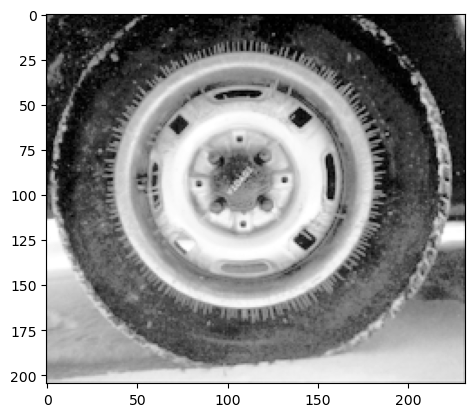

In [26]:
# equalize the tire histogram
tire_hist_equalized = skimage.exposure.equalize_hist(tire)
plt.imshow(tire_hist_equalized)

Text(0.5, 1.0, 'Tire Image with Histogram Equalization')

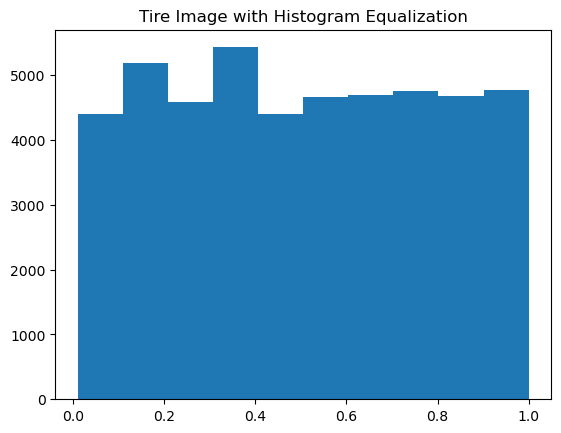

In [27]:
plt.hist(tire_hist_equalized.flatten())
plt.title("Tire Image with Histogram Equalization")

## Q4.
12. Describe the appearance of the equalized image.

The equalized image is much lighter (higher pixel intensity values) compared to other tire images before. Many details about the tire have been brought out, but so has noise in the image. Additionally, the overall contrast between the tire and the background has improved as the road, and the part behind the tire are more clear and distinct. Overall, the originally low contrast image has been enhanced.

13. Describe how the histogram looks like in the context of intensity distribution. Why does it look like this? What does each histogram say about each equalized image?

The histogram of intensity is close to following a uniform distribution, which makes sense as it is what histogram equalization is trying to achieve. Compared to the original image, the uniform distribution has a mean that is much higher (the image is lighter in general) and has a lot of contrast due to the very high variance of the distribution. 

In general, histograms for equalized images say that the images are high contrast with no pixel intensity that is "dominating" all the others. 